<a href="https://colab.research.google.com/github/tishhapatel/Natural-Language-Processing-Lab/blob/main/NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install nltk


In [9]:
import pandas as pd
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier

# Load reduced dataset
df = pd.read_csv("travel_blog_corpus_reduced_2000words.csv")

# Pick any one row/sample to demonstrate (Lab usually expects 1 sample)
text = df.loc[0, "content_2000"]

print("Sample Text:", text[:300], "\n")

# 2 Tokenization
tokens = word_tokenize(text)
sentences = sent_tokenize(text)
print("Word Tokens:", tokens[:30])
print("Sentences:", sentences[:2])

# 3 Stopword Removal
stop_words = set(stopwords.words("english"))
filtered = [w for w in tokens if w.lower() not in stop_words and w.isalnum()]
print("\nAfter Stopword Removal:", filtered[:30])

# 4 Stemming
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered[:30]]
print("\nStemming:", stemmed)

# 5 Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(w) for w in filtered[:30]]
print("\nLemmatization:", lemmatized)

# 6 POS Tagging
pos_tags = pos_tag(tokens[:30])
print("\nPOS Tags:", pos_tags)

# 7 Named Entity Recognition
ner_tree = ne_chunk(pos_tag(tokens[:30]))
print("\nNER Output:")
print(ner_tree)

# 8 Sentiment Analysis
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print("\nSentiment:", sentiment)

# 9 Text Classification (Toy Example)
data = [("I love this", "pos"), ("I hate this", "neg")]

def features(s):
    return {w.lower(): True for w in word_tokenize(s)}

train = [(features(s), l) for s, l in data]
clf = NaiveBayesClassifier.train(train)

print("\nClassifier Test:", clf.classify(features("I love NLP")))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'travel_blog_corpus_reduced_2000words.csv'

Load Dataset


In [10]:
df = pd.read_csv("travel_blog_reduced.csv")
df.head()


,source,url,content,word_count,content_2000,word_count_2000
0,NomadicMatt,https://www.nomadicmatt.com/travel-blogs/capit...,\nI’m a sucker for a good travel rewards card....,1491,I m a sucker for a good travel rewards card Ov...,1551
1,NomadicMatt,https://www.nomadicmatt.com/travel-blogs/trave...,Let’s face it: not everyone is going to be ab...,1444,Let s face it not everyone is going to be able...,1501
2,NomadicMatt,https://www.nomadicmatt.com/travel-blogs/best-...,Tokyo is one of those cities that feels endles...,1687,Tokyo is one of those cities that feels endles...,1756
3,NomadicMatt,https://www.nomadicmatt.com/travel-blogs/holaf...,"\nWhen you’re traveling, staying connected is ...",1484,When you re traveling staying connected is ess...,1510
4,NomadicMatt,https://www.nomadicmatt.com/travel-blogs/the-u...,Whenever I ask readers what the number one th...,3319,Whenever I ask readers what the number one thi...,2000


Reduce each row to 2000 words

In [11]:
import re

def reduce_to_2000_words(text):
    words = re.findall(r"\b\w+\b", str(text))
    return " ".join(words[:2000])

df["content_2000"] = df["content"].apply(reduce_to_2000_words)
df["word_count_2000"] = df["content_2000"].apply(lambda x: len(x.split()))
df[["word_count", "word_count_2000"]].head()


,word_count,word_count_2000
0,1491,1551
1,1444,1501
2,1687,1756
3,1484,1510
4,3319,2000


Perform NLTK

Tokenization

In [13]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize

df["word_tokens"] = df["content_2000"].apply(word_tokenize)
df["sent_tokens"] = df["content_2000"].apply(sent_tokenize)

df[["word_tokens", "sent_tokens"]].head(2)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,word_tokens,sent_tokens
0,"[I, m, a, sucker, for, a, good, travel, reward...",[I m a sucker for a good travel rewards card O...
1,"[Let, s, face, it, not, everyone, is, going, t...",[Let s face it not everyone is going to be abl...


Stopword Removal

In [14]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words and w.isalnum()]

df["filtered_tokens"] = df["word_tokens"].apply(remove_stopwords)
df["filtered_tokens"].head(2)


,filtered_tokens
0,"[sucker, good, travel, rewards, card, years, c..."
1,"[Let, face, everyone, going, able, travel, Whe..."


Stemming


In [15]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df["stemmed_tokens"] = df["filtered_tokens"].apply(lambda toks: [stemmer.stem(w) for w in toks])
df["stemmed_tokens"].head(2)


,stemmed_tokens
0,"[sucker, good, travel, reward, card, year, col..."
1,"[let, face, everyon, go, abl, travel, whether,..."


Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df["lemmatized_tokens"] = df["filtered_tokens"].apply(lambda toks: [lemmatizer.lemmatize(w) for w in toks])
df["lemmatized_tokens"].head(2)


,lemmatized_tokens
0,"[sucker, good, travel, reward, card, year, col..."
1,"[Let, face, everyone, going, able, travel, Whe..."


POS Tagging

In [18]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

from nltk import pos_tag

df["pos_tags"] = df["word_tokens"].apply(pos_tag)
df["pos_tags"].head(1)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,pos_tags
0,"[(I, PRP), (m, VBP), (a, DT), (sucker, NN), (f..."


Named Entity Recognition (NER)

In [20]:
import nltk
nltk.download("maxent_ne_chunker_tab")

from nltk import ne_chunk

def extract_named_entities(tokens):
    chunked = ne_chunk(pos_tag(tokens))
    entities = []
    for chunk in chunked:
        if hasattr(chunk, "label"):
            entity = " ".join(c[0] for c in chunk)
            label = chunk.label()
            entities.append((entity, label))
    return entities

df["named_entities"] = df["word_tokens"].apply(extract_named_entities)
df["named_entities"].head(2)


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


,named_entities
0,"[(Capital One Venture, ORGANIZATION), (Credit,..."
1,"[(United States, GPE), (Europe, GPE), (Disney,..."


Sentiment Analysis (VADER)

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df["sentiment_scores"] = df["content_2000"].apply(lambda x: sia.polarity_scores(x))
df["compound_sentiment"] = df["sentiment_scores"].apply(lambda d: d["compound"])

df[["sentiment_scores", "compound_sentiment"]].head(3)


,sentiment_scores,compound_sentiment
0,"{'neg': 0.064, 'neu': 0.741, 'pos': 0.196, 'co...",0.9997
1,"{'neg': 0.06, 'neu': 0.749, 'pos': 0.191, 'com...",0.9997
2,"{'neg': 0.025, 'neu': 0.788, 'pos': 0.187, 'co...",0.9999


Text Classification (Naive Bayes)

In [22]:
from nltk.classify import NaiveBayesClassifier

training_data = [
    ("I love this place", "pos"),
    ("This is amazing", "pos"),
    ("I hate this", "neg"),
    ("This is terrible", "neg"),
]

def features(sentence):
    return {w.lower(): True for w in word_tokenize(sentence)}

train_set = [(features(text), label) for text, label in training_data]
classifier = NaiveBayesClassifier.train(train_set)

df["predicted_sentiment"] = df["content_2000"].apply(lambda x: classifier.classify(features(x)))
df["predicted_sentiment"].value_counts()


,count
predicted_sentiment,
pos,46


In [24]:
output_file = "travel_blog_corpus_NLTK_OUTPUT.csv"
df.to_csv(output_file, index=False)
print("Saved:", output_file)


Saved: travel_blog_corpus_NLTK_OUTPUT.csv


Wordcloud


In [25]:
!pip install wordcloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


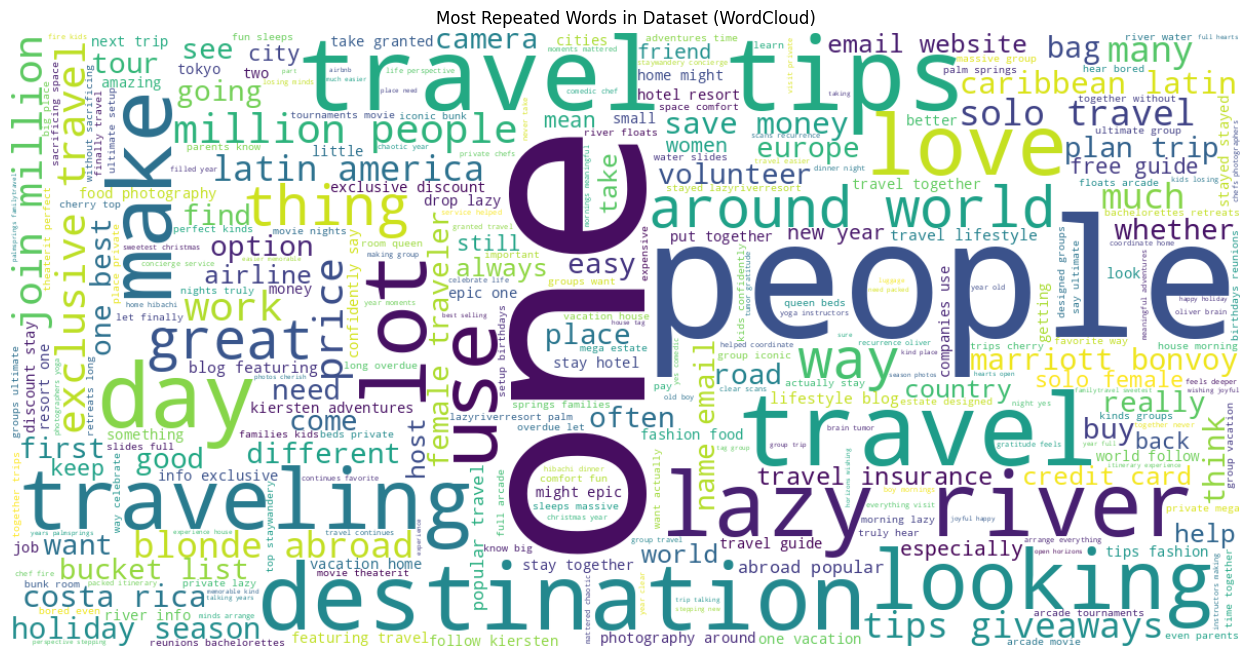

Saved image: dataset_wordcloud.png


In [27]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

# Load dataset
df = pd.read_csv("travel_blog_corpus_NLTK_OUTPUT.csv")  # or your main csv

# Combine all text from dataset
all_text = " ".join(df["content_2000"].astype(str))

# Clean text
all_text = re.sub(r"[^a-zA-Z\s]", " ", all_text)
all_text = all_text.lower()

# Remove stopwords
stop_words = set(stopwords.words("english"))
words = [w for w in all_text.split() if w not in stop_words and len(w) > 2]
clean_text = " ".join(words)

# Generate WordCloud
wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=300
).generate(clean_text)

# Plot WordCloud
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Repeated Words in Dataset (WordCloud)")
plt.show()

# Save as image
wc.to_file("dataset_wordcloud.png")
print("Saved image: dataset_wordcloud.png")


Bar chart

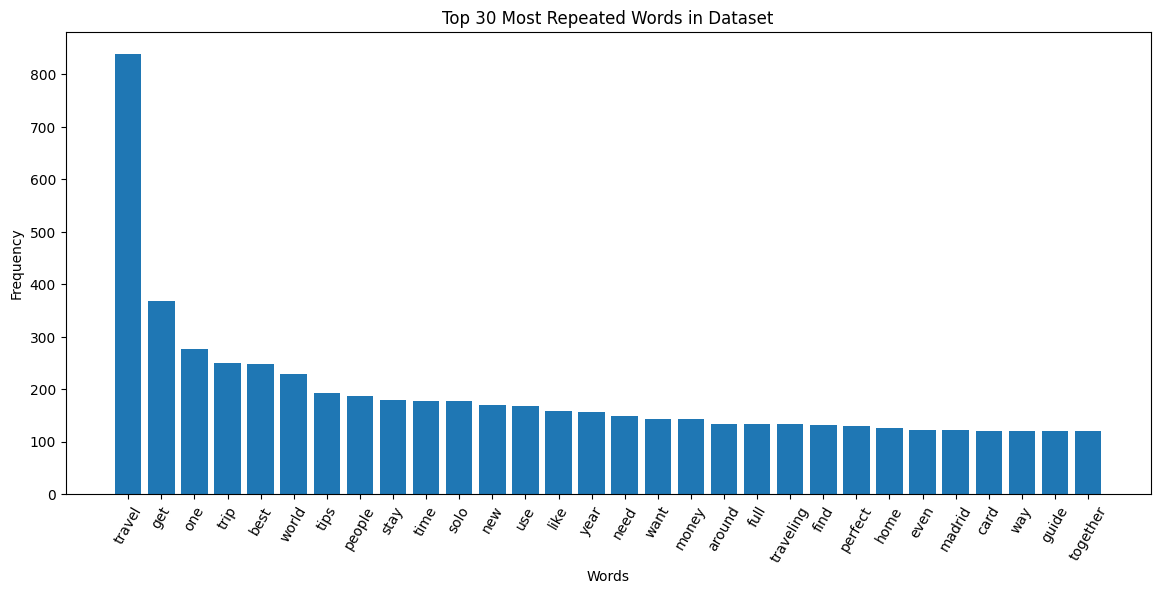

In [28]:
from collections import Counter

# Count word frequency
word_freq = Counter(words)

top_words = word_freq.most_common(30)
labels = [x[0] for x in top_words]
values = [x[1] for x in top_words]

# Plot bar chart
plt.figure(figsize=(14,6))
plt.bar(labels, values)
plt.xticks(rotation=60)
plt.title("Top 30 Most Repeated Words in Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()
